文本分类，把一句话分类为 消极 和 积极。

In [55]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [56]:
dataset, info = tfds.load('imdb_reviews/subwords8k',
                          with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [57]:
encoder = info.features['text'].encoder

In [58]:
# 词汇表大小
print(encoder.vocab_size)

8185


In [59]:
# 词汇表的词
print(encoder.decode([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                      11, 12, 13, 14, 15, 16, 17, 18, 19, 20]))

the , . a and of to s is brin I that this it  />< />was The as 


In [60]:
sample_string = 'I am a sentence.'

In [61]:
encoded_string = encoder.encode(sample_string)
encoded_string

[12, 258, 4, 7745, 7975]

In [62]:
original_string = encoder.decode(encoded_string)
original_string

'I am a sentence.'

In [63]:
for index in encoded_string:
    print('{} --> {}'.format(index, encoder.decode([index])))

12 --> I 
258 --> am 
4 --> a 
7745 --> sentence
7975 --> .


### Prepare the data

In [64]:
train_batches = train_dataset.shuffle(10000).padded_batch(64, padded_shapes=([None],[]))
test_batches = test_dataset.shuffle(10000).padded_batch(64, padded_shapes=([None],[]))

In [65]:
model = keras.Sequential([
    keras.layers.Embedding(encoder.vocab_size, 64),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

In [66]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [67]:
history = model.fit(train_batches, epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 329s 842ms/step - loss: 0.6526 - accuracy: 0.5544 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

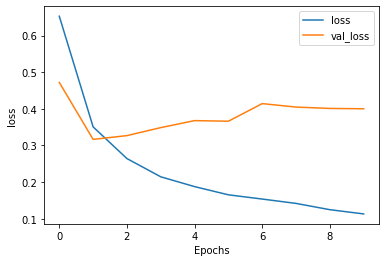

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()


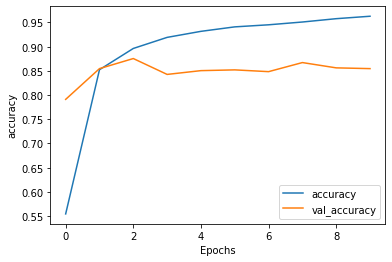

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [72]:
def pad_zero_to_size(vec, size):
    zeros = [0] * (size - len(vec))
    vec.extend(zeros)
    return vec

In [73]:
def sample_predict(text, is_pad):
    encoded_text = encoder.encode(text)

    if is_pad:
        encoded_text = pad_zero_to_size(encoded_text, 64)
    encoded_text = tf.cast(encoded_text, tf.float32)

    return model.predict(tf.expand_dims(encoded_text, 0))

In [74]:
sample_text = "The movie was cool."
predictions = sample_predict(sample_text, is_pad=True)
predictions

array([[0.19812024]], dtype=float32)

In [75]:
sample_text = "The movie was bad."
predictions = sample_predict(sample_text, is_pad=True)
predictions

array([[-1.0581455]], dtype=float32)

In [76]:
sample_text = "The movie was not bad."
predictions = sample_predict(sample_text, is_pad=True)
predictions

array([[-1.3029747]], dtype=float32)